<a href="https://colab.research.google.com/github/Trantracy/Movie-review-with-Logistic-Regression/blob/master/Movie_review_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The moview review Sentiment Analysis :
 

**STEP 1:** Overview the data

**STEP 2:** Cleaning data


1.   Lemmatization
2.   Stop word
3.   Cleanining data
4.   TF-IDF

**STEP 3:** Classification by Logistic Regression



In [12]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
# Mounted to Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Import the dataset
data = pd.read_csv('/content/drive/My Drive/FTMLE - Tonga/Data/movie_review.csv', encoding='utf-8', sep='\t')

In [16]:
# checkout data set. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         22500 non-null  object
 1   review     22500 non-null  object
 2   sentiment  22500 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 527.5+ KB


In [17]:
# Check missing data
data.isnull().sum()

id           0
review       0
sentiment    0
dtype: int64

In [18]:
# overview 10 random rows
data.sample(10)

,id,review,sentiment
10442,2798_1,This movie is bad. If you are thinking about w...,0
9671,5302_9,This movie kept me constantly entertained. In ...,1
14899,3996_1,I don't see what everyone liked about this mov...,0
21992,6643_4,"Terminus Paradis was exceptional, but \Niki ar...",0
21383,1987_10,That movie was awesome! I can't get over it's ...,1
10423,6001_2,This may sound crazy to even the people who re...,0
19865,5349_4,This straight-to-video duffer is another nail ...,0
12570,10579_2,According to IMDb Takashi Miike's Master of Ho...,0
22111,6005_8,Although this film is somewhat sanitized (beca...,1
2853,8151_10,I saw it in a posh movie theater where the aud...,1


In [19]:
# get a random  review
data.iloc[3000]['review']

'No wonder this movie never saw the light of day. The timing was of the release was awful. The Gong Show had already \\jumped the shark\\" by the time the movie came out, so who would pay money just to see a few of the censored clips from the original run of the show? And the show clips are just a tiny bit of this pathetic, 90-minute whine by Chuck Barris about how hard his life was as host of the show. Did he really expect we would feel sorry for him and his messed-up millionaire life? Did he really think we even wanted to KNOW about his life? (Obviously so, since he later wrote his weird autobiography about his career as a CIA operative.) Did he think the gag of having everyone, everywhere audition for him would stay fresh for 90 minutes? Or the network executive hounding him at every turn? This might have worked as the plot for a 30-minute sitcom episode, but not as a full-length movie. However, it was nice to see Rip Taylor, Gene Gene, and the Unknown Comic again (although, to make

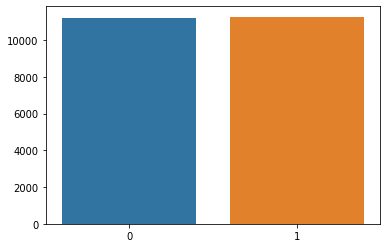

In [20]:
# Check the balance of labels
label = data['sentiment'].value_counts()
sns.barplot(x =label.index ,y = label.values)
plt.show()
# the dataset is highly balanced

## Cleaning data

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons to append later
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

tfidf = TfidfVectorizer(stop_words='english',
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)

## TF- IDF and Classification

In [0]:
# Split the dataset: training and test set
from sklearn.model_selection import train_test_split
X = data['review']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 6)

In [44]:
# Connect LogisticRegression and TfidfVectorizer by Pineline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(random_state=0))])

clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=<function preprocessor at 0x7f27e71e2f28>,
                                 smooth_idf=True, stop_words='english',
                                 strip_accents=N...
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenizer_porter at 0x7f27e71e2ea0>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
            

In [46]:
# Check accuracy, precision,recall
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      2242
           1       0.88      0.90      0.89      2258

    accuracy                           0.89      4500
   macro avg       0.89      0.89      0.89      4500
weighted avg       0.89      0.89      0.89      4500



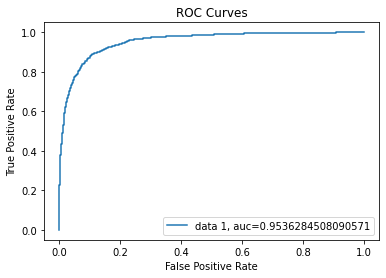

In [48]:
# Sentiment_model evaluation by ROC Curves
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn import metrics

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curves')
plt.show()


### Add the prediction to the DataFrame

In [0]:
prediction = clf.predict(data['review'])
data['prediction'] = prediction

In [52]:
data

,id,review,sentiment,prediction
0,5814_8,stuff go moment mj i ve start listen music wat...,1,1
1,2381_9,classic war world timothy hines entertain film...,1,1
2,7759_3,film start manager nicholas bell give welcome ...,0,0
3,3630_4,must assume praised film great film opera ever...,0,0
4,9495_8,superbly trashy wondrously unpretentious explo...,1,0
...,...,...,...,...
22495,3453_3,seem like consideration go imdb review film go...,0,0
22496,5064_1,believe make film completely unnecessary first...,0,0
22497,10905_3,guy loser can t get girls need build pick stro...,0,0
22498,10194_3,minute documentary buã uel make early one spai...,0,0


## Test setset

In [0]:
# Import the dataset
test = pd.read_csv('/content/drive/My Drive/FTMLE - Tonga/Data/movie_review_evaluation.csv', encoding='utf-8', sep='\t')

In [54]:
test


,id,review
0,10633_1,I watched this video at a friend's house. I'm ...
1,4489_1,`The Matrix' was an exciting summer blockbuste...
2,3304_10,This movie is one among the very few Indian mo...
3,3350_3,The script for this movie was probably found i...
4,1119_1,Even if this film was allegedly a joke in resp...
...,...,...
2495,1065_10,"Dark Angel is a futuristic sci-fi series, set ..."
2496,7261_3,This British-Spanish co-production is one of t...
2497,11075_10,"Having read the reviews for this film, I under..."
2498,2041_2,Well I'll start with the good points. The movi...


In [60]:
test.iloc[2495]['review']

'Dark Angel is a futuristic sci-fi series, set in post-apocalyptic Seattle, centering on Max (Jessica Alba), a genetically enhanced young woman, on the run from her creators.<br /><br />The Dark Angel universe is absorbing, (not as much as say Buffy, but absorbing nonetheless) with an interesting and believable set of characters. Certainly, it is not for everyone, but those who give it time will find themselves watching one of the most enjoyable series out there. Dark Angel is criminally overlooked, and under-rated, and was unfortunatly canceled after only 2 series. Which was a great shame, as this had the potential to become a great series, although its 42 episodes are only 10 shy of long running BBC sci-fi comedy Red Dwarf. As it is Dark Angel remains unfinished, so seek it out, and if you want more, lobby Fox to make another series.'

In [55]:
 clf.predict(test['review'])

array([0, 0, 1, ..., 1, 0, 1])